![](https://i.imgur.com/JsMvGnP.png)

# Tarefa 9.3: Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [2]:
# seu código 
#Importando as bibliotecas

import pandas as pd 
import numpy as np 
import  matplotlib.pyplot as plt

In [4]:
# seu código
churn_df = pd.read_csv("Churn_Modelling.csv")
churn_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [6]:
churn_df.shape

(10000, 14)

In [7]:
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 3.2 Preparação e limpeza dos dados

In [20]:
# seu código

churn_df['RowNumber'].isnull().sum()



0

In [32]:
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [33]:
churn_df['Exited'].value_counts(normalize = True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

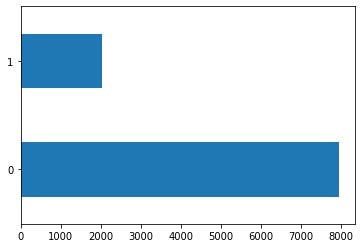

In [34]:
churn_df['Exited'].value_counts().plot.barh();

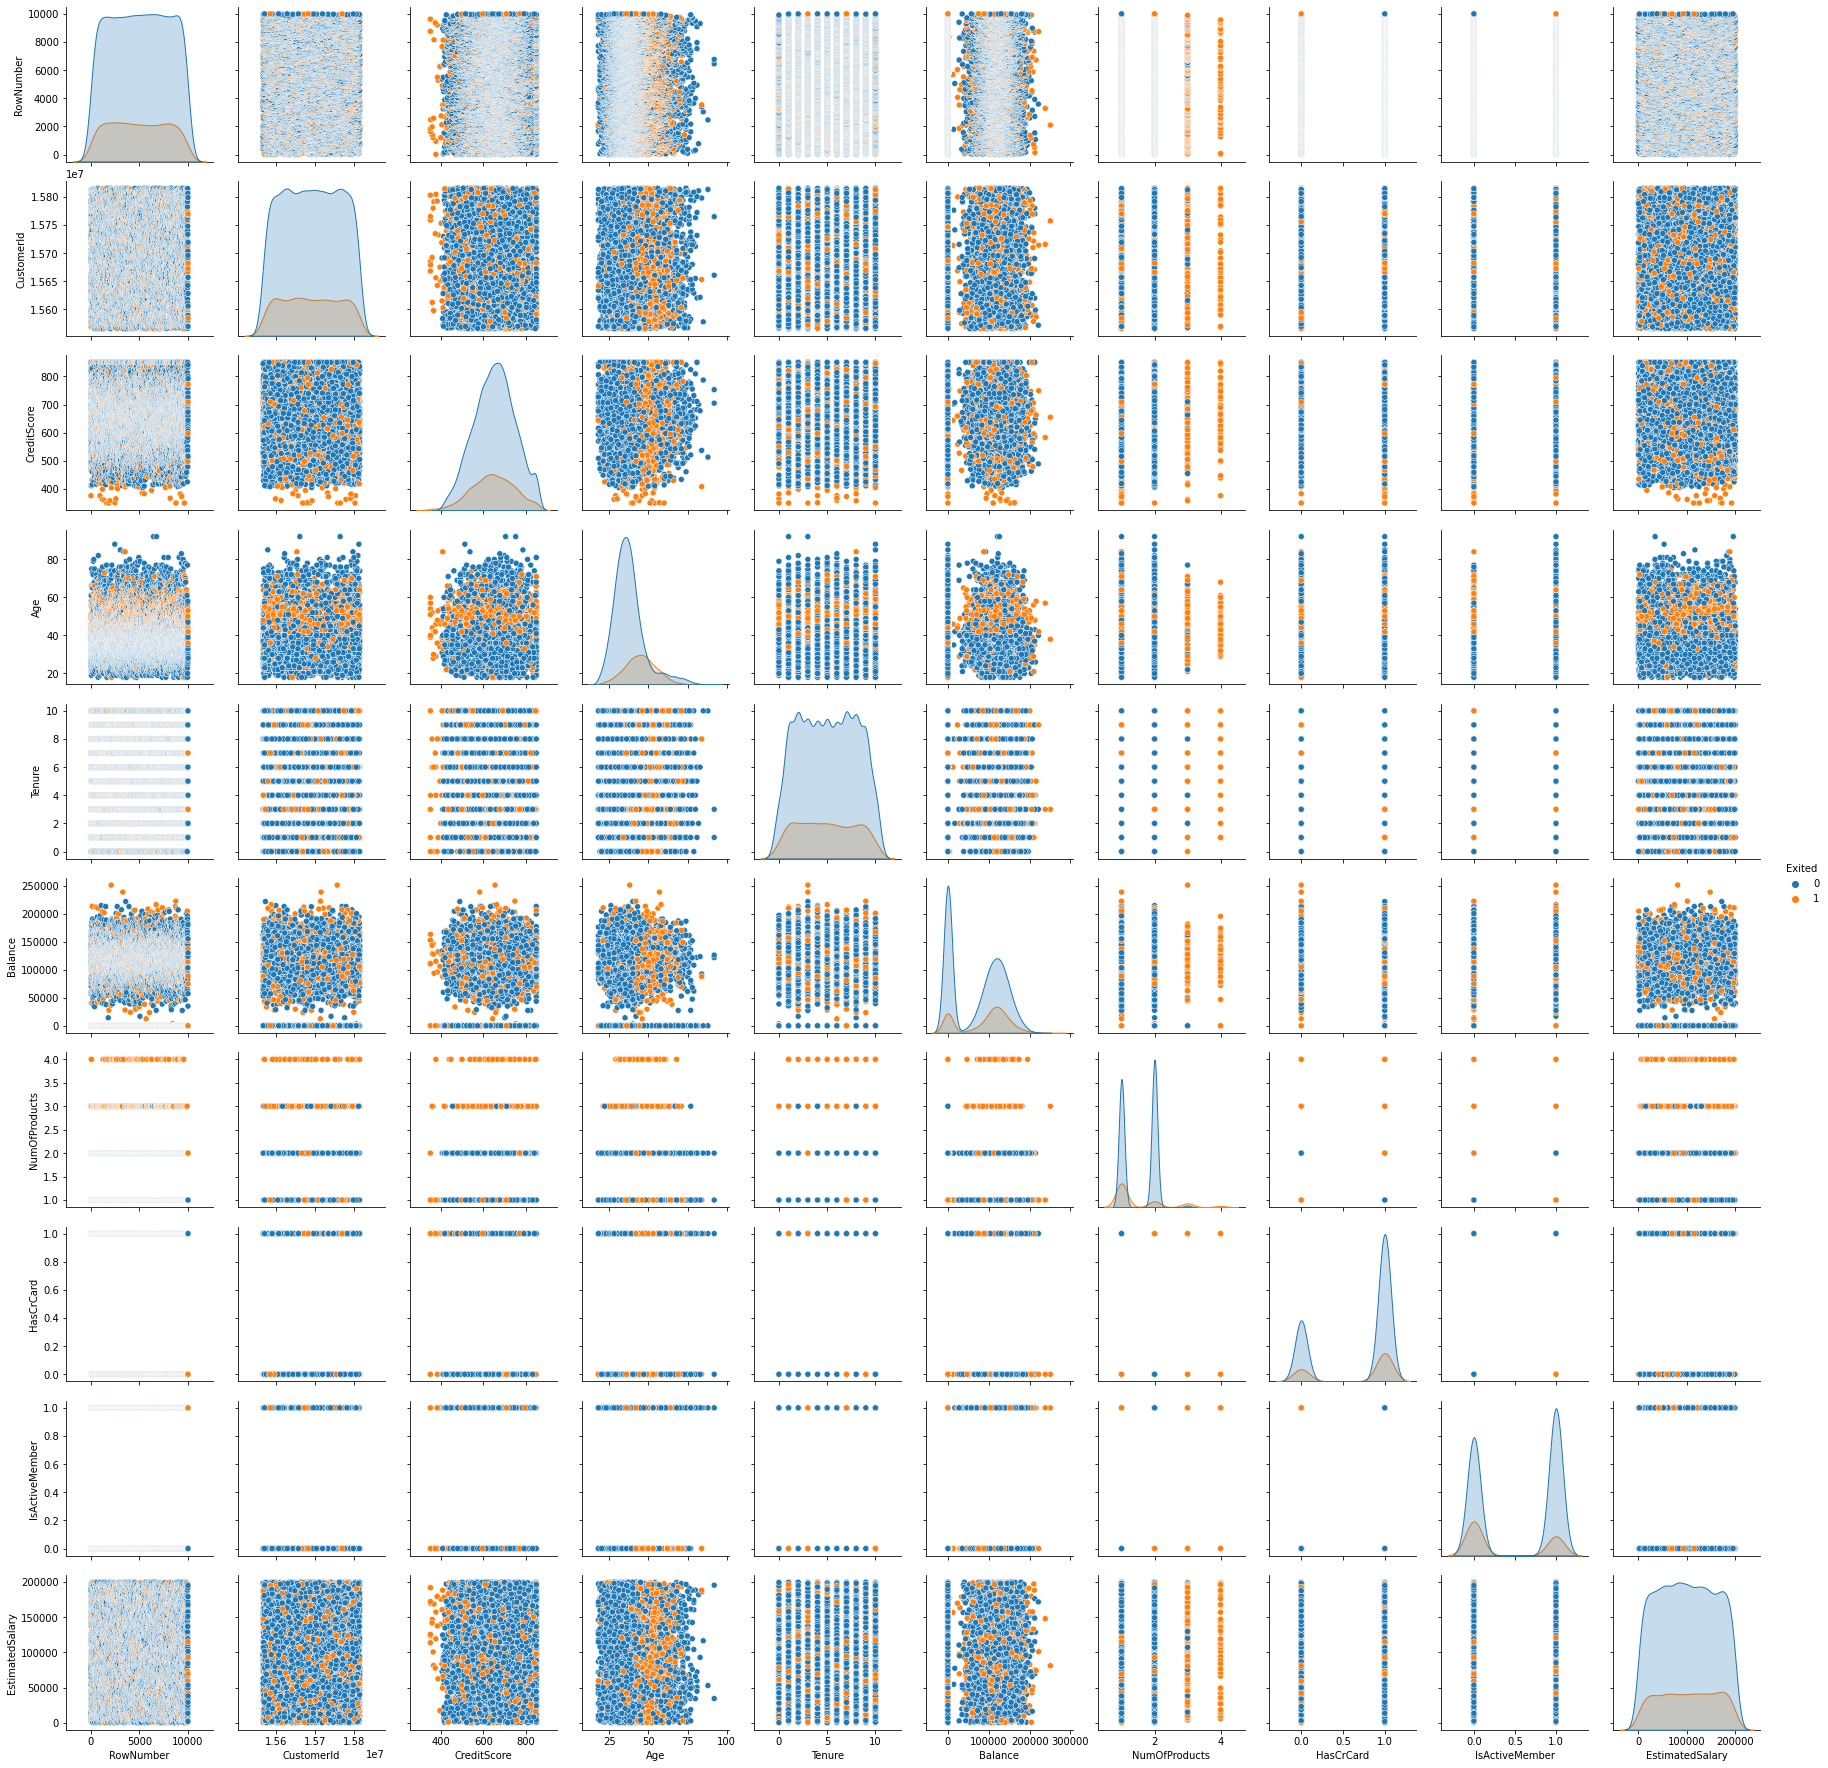

In [35]:
# pairplot
import seaborn as sns

sns.pairplot(churn_df, hue="Exited");



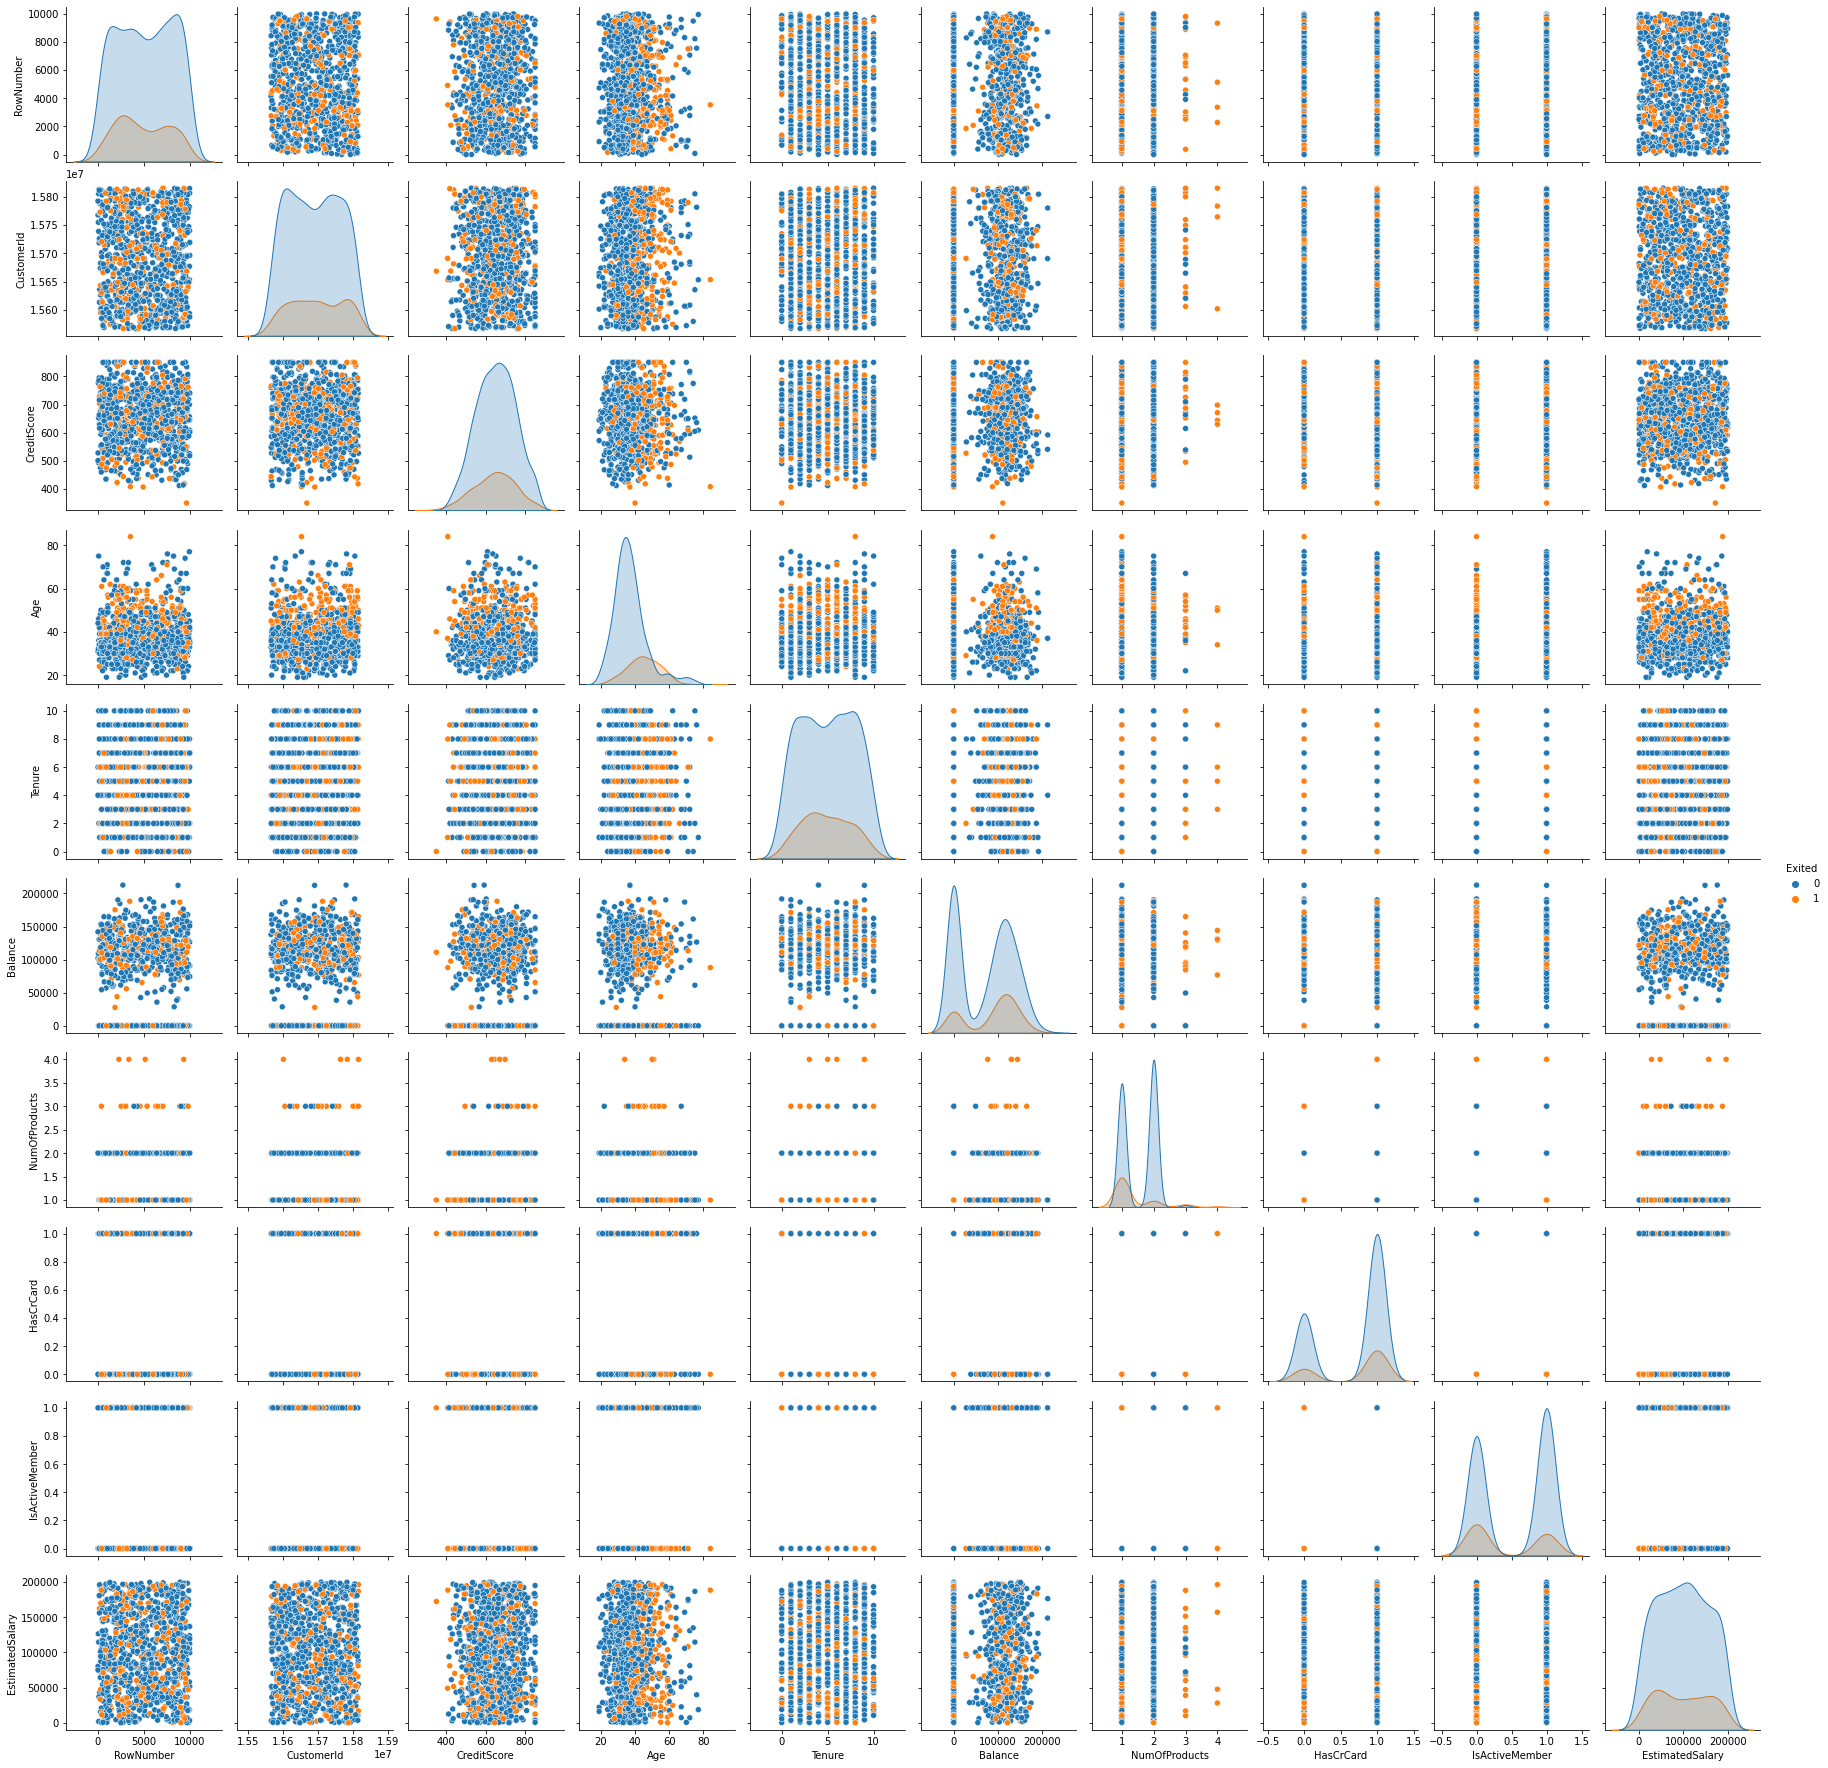

In [37]:
# seu código
amostra_dados = churn_df.sample(1000)
# como os nossos dados estão distribuídos e quais tipos de modelos seriam interessantes
sns.pairplot(amostra_dados, hue="Exited");

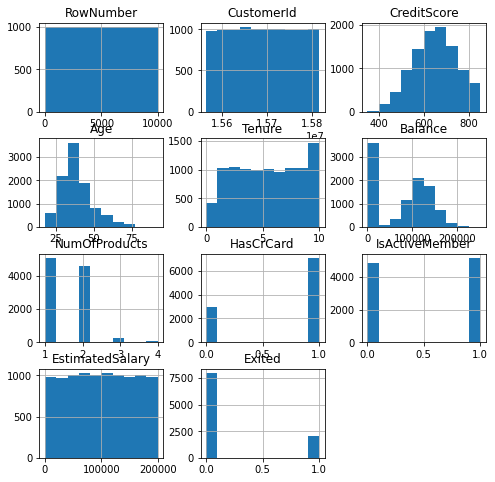

In [38]:
# como está distribuída cada coluna numérica
churn_df.hist(figsize=(8, 8));

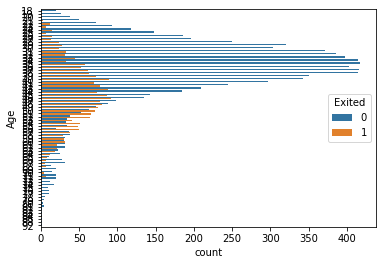

In [46]:
# Idade das pessoas comparado com desistencia
sns.countplot(y='Age', hue='Exited', data=churn_df);

In [48]:
churn_df.corr()

RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumber       -0.009067       0.007246   0.000599        0.012044   
CustomerId      -0.012419       0.016972  -0.014025        0.001665   
CreditScore      0.006268       0.012238  -0.005458        0.025651   
Age              0.028308      -0.030680  -0.011721        0.085472   
Tenure          -0.012254       0.013444   0.022583       -0.028362   
Balance          1.000000      -0.304180  -0.014858       -0.010084   
NumOfProducts   -0.304180       1.000000   0.003183        0.009612   
HasCrCard       -0.014858       0.003183   1.000000       -0.011866   
IsActiveMember  -0.010084       0.009612  -0.011866        1.000000   
EstimatedSalary  0.012797       0.014204  -0.009933       -0.011421   
Exited           0.118533      -0.047820  -0.007138       -0.156128   

                 EstimatedSalary    Exited  
RowNumber              -0.005988 -0.016571  
CustomerId              0.015271 -0.006248  
CreditScore            -0.001384 -0.027094  
Age                    -0.007201  0.285323  
Tenure                  0.007784 -0.014001  
Balance                 0.012797  0.118533  
NumOfProducts           0.014204 -0.047820  
HasCrCard              -0.009933 -0.007138  
IsActiveMember         -0.011421 -0.156128  
EstimatedSalary         1.000000  0.012097  
Exited                  0.012097  1.000000

###  Seleção de atributos  e Preparando dados para o modelo

In [97]:
# seu código
churn_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [104]:
# seu código
target = churn_df['Exited']
target
y = target
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [98]:
features = churn_df.drop('Exited', axis = 1)
features.columns, features.shape

(Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
        'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
        'IsActiveMember', 'EstimatedSalary'],
       dtype='object'),
 (10000, 13))

In [99]:
features.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  
0        101348.88  
1        112542.58  
2        113931.57  
3         93826.63  
4         79084.10

### Fazendo o one hot encoding das variáveis catgóricas de Zona

In [100]:
features['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [101]:
X = pd.get_dummies(features)
X.shape 

(10000, 2947)

In [102]:
X.head()

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
0          1    15634602          619   42       2       0.00              1   
1          2    15647311          608   41       1   83807.86              1   
2          3    15619304          502   42       8  159660.80              3   
3          4    15701354          699   39       1       0.00              2   
4          5    15737888          850   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  ...  Surname_Zubarev  \
0          1               1        101348.88  ...                0   
1          0               1        112542.58  ...                0   
2          1               0        113931.57  ...                0   
3          0               0         93826.63  ...                0   
4          1               1         79084.10  ...                0   

   Surname_Zubareva  Surname_Zuev  Surname_Zuyev  Surname_Zuyeva  \
0                 0             0              0               0   
1                 0             0              0               0   
2                 0             0              0               0   
3                 0             0              0               0   
4                 0             0              0               0   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0                0              1   
1                 0                  0                1              1   
2                 1                  0                0              1   
3                 1                  0                0              1   
4                 0                  0                1              1   

   Gender_Male  
0            0  
1            0  
2            0  
3            0  
4            0  

[5 rows x 2947 columns]

### 3.4 Construção do modelo

In [105]:
# seu código
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 42
                                          
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,
                                                        random_state=SEED,
                                                        train_size = 0.7 )
X_treino.shape, y_treino.shape

((7000, 2947), (7000,))

<h2 style="color:green"> Criando um modelo de base (baseline) </h2>

Usaremos o DummyClassifier - fit, predict, score (métrica de classificação)

In [106]:
from sklearn.dummy import DummyClassifier

SEED=42
modelo_dummy = DummyClassifier(strategy='most_frequent', random_state=SEED)

modelo_dummy.fit(X_treino, y_treino)
y_pred_dummy = modelo_dummy.predict(X_teste)

In [107]:
y_treino

9069    1
2603    0
7738    0
1579    0
5058    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 7000, dtype: int64

In [108]:
modelo_dummy.score(X_teste, y_teste) # acuracia é a métrica do score

0.8053333333333333

In [109]:
y_teste[:5].values # o mesmo que y_true - são os valores verdadeiros para X_teste

array([0, 0, 0, 0, 0], dtype=int64)

In [110]:
 y_pred_dummy[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [111]:
y_pred_dummy.sum()

0

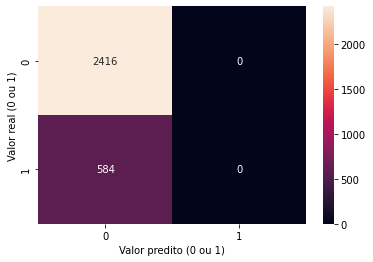

In [112]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true=y_teste, y_pred=y_pred_dummy)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Valor predito (0 ou 1)')
plt.ylabel('Valor real (0 ou 1)');

In [113]:
from sklearn.metrics import roc_auc_score, classification_report

# score roc auc
roc_auc_score(y_teste, y_pred_dummy)

0.5

In [114]:
# report de classificação
print(classification_report(y_teste, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



C:\Users\SERGIOMEDINA\Anaconda3\envs\LabDev\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2 style="color:green"> Usando diferentes modelos </h2>

Podemos ver se uma regressão logistíca descreve bem os dados, ou uma árvore ou floresta aleatória ou o XGBoost (também é um modelo baseado em árvores), entre outros e diversas métricas de classificação.

<h3 style="color:green"> (a) KNN </h3>

![](https://www.researchgate.net/profile/Julio-Arakaki/publication/316997554/figure/fig3/AS:614266562441217@1523463969064/Figura-4-Classificacao-por-agrupamento-KNN-k-Nearest-Neighbour-para-as-consoantes.png)

---------------------------------------------------------------------------------------------------------------------------
<h3 style="color:green"> (b) Regressão logística </h3>

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse4.mm.bing.net%2Fth%3Fid%3DOIP.cW_1Ea8OgMC6K1i8QDtIqQHaDe%26pid%3DApi&f=1)


---------------------------------------------------------------------------------------------------------------------------
<h3 style="color:green"> (c) support Vector Machine (SVM)  </h3>

![](https://miro.medium.com/max/1000/1*Yh26T_T_5pGsxvNAguyDKw.png)


---------------------------------------------------------------------------------------------------------------------------
<h3 style="color:green"> (d) Stochastic Gradient Descent </h3>

![](http://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png)

---------------------------------------------------------------------------------------------------------------------------
<h3 style="color:green"> (e) Random Forest</h3>

![](https://www.researchgate.net/profile/Erika-Amstalden-Van-Hove/publication/228540194/figure/fig1/AS:301839783350274@1448975620988/The-Random-Forest-classifier-is-an-ensemble-of-decision-trees-where-the-single-trees-are.png)

---------------------------------------------------------------------------------------------------------------------------
<h3 style="color:green"> (f) XGB </h3>

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fkevinvecmanis.io%2Fassets%2Fxgb_tuning%2Festimators.png&f=1&nofb=1)

### 3.5 Avaliação do modelo

In [148]:
# seu código
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier


In [149]:
# seu código
lista_modelos = [KNeighborsClassifier(),
                 LogisticRegression(),
                 RandomForestClassifier(),
                 GaussianNB(),
                 XGBClassifier()]

lista_modelos

[KNeighborsClassifier(),
 LogisticRegression(),
 RandomForestClassifier(),
 GaussianNB(),
 XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)]

In [150]:
for modelo in lista_modelos:
    print(f" Modelo {modelo.__class__.__name__}")

 Modelo KNeighborsClassifier
 Modelo LogisticRegression
 Modelo RandomForestClassifier
 Modelo GaussianNB
 Modelo XGBClassifier


In [151]:
# seu código
for modelo in lista_modelos:

    print(f" Modelo {modelo.__class__.__name__}")
    modelo.fit(X_treino, y_treino)
    
    print('\nAcurácia')
    acc_treino = modelo.score(X_treino, y_treino)
    acc_teste = modelo.score(X_teste, y_teste)
    print('Treino', acc_treino)
    print('Teste', acc_teste)

    print('\nRoc auc')
    y_proba_treino = modelo.predict_proba(X_treino) # predict proba tem como saída, 0.7 e 0.3, que são as probabilidades do dados pertencer a uma ou outra classe
    y_proba_teste = modelo.predict_proba(X_teste)

    roc_treino = roc_auc_score(y_treino, y_proba_treino[:, 1]) #selecionando todos os valores da classe 1
    roc_teste = roc_auc_score(y_teste, y_proba_teste[:, 1])
    print(f"Treino = {roc_treino}")
    print(f"Teste = {roc_teste}")
    print('\n')

    print('-' * 77)

 Modelo KNeighborsClassifier

Acurácia
Treino 0.81
Teste 0.7653333333333333

Roc auc
Treino = 0.7970500103538665
Teste = 0.5140051625011339


-----------------------------------------------------------------------------
 Modelo LogisticRegression

Acurácia
Treino 0.7924285714285715
Teste 0.8053333333333333

Roc auc
Treino = 0.5784785238227641
Teste = 0.5797664542320603


-----------------------------------------------------------------------------
 Modelo RandomForestClassifier

Acurácia
Treino 1.0
Teste 0.8603333333333333

Roc auc
Treino = 1.0
Teste = 0.8393522350993378


-----------------------------------------------------------------------------
 Modelo GaussianNB

Acurácia
Treino 0.7818571428571428
Teste 0.7933333333333333

Roc auc
Treino = 0.7444263753241245
Teste = 0.7454994670234962


-----------------------------------------------------------------------------
 Modelo XGBClassifier

Acurácia
Treino 0.96
Teste 0.8643333333333333

Roc auc
Treino = 0.992493725953936
Teste = 0.847

### 3.4 Otimização do modelo

In [152]:
# seu código
from sklearn.model_selection import GridSearchCV

parametros = {'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.2],
            'n_estimators': [50, 100, 150]}

xgb = XGBClassifier(random_state = SEED)

gs = GridSearchCV(xgb, 
                  parametros, 
                  scoring = 'f1', 
                  cv = 5,
                  verbose=3)

gs.fit(X_treino, y_treino)

melhor_modelo = gs.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.548, total=  19.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.0s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.554, total=  20.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   39.7s remaining:    0.0s


[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.575, total=  17.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.566, total=  19.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=50, score=0.509, total=  16.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.564, total=  32.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.558, total=  33.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.580, total=  34.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=100 ................
[CV]  learning_rate=0.1, max_depth=3, n_estimators=100, score=0.596, total=  38

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 61.4min finished


In [153]:
# seu código

print(f" Melhor Modelo = {melhor_modelo}")

y_pred_melhor_modelo = melhor_modelo.predict(X_teste)


 Melhor Modelo = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [154]:
print(classification_report(y_teste, y_pred_melhor_modelo))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2416
           1       0.77      0.48      0.59       584

    accuracy                           0.87      3000
   macro avg       0.83      0.72      0.76      3000
weighted avg       0.86      0.87      0.86      3000



In [155]:
cm_melhor_modelo = confusion_matrix(y_teste, y_pred_melhor_modelo)

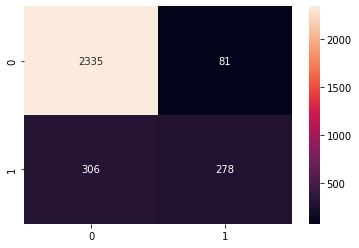

In [156]:
sns.heatmap(cm_melhor_modelo, annot=True, fmt='g');

## Salvando o modelo

In [157]:
import pickle

pickle.dump(melhor_modelo, open('melhor_modelo_xgb.pkl', 'wb'))

## 4. Conclusão
O fluxo de trabalho de Aprendizado de Máquina não termina após a avaliação de performance do modelo escolhido. Na verdade, esta seria somente a primeira iteração de um processo que pode ter dezenas de tentativas.

Encorajamos você a repetir novamente o processo descrito neste notebook. Contudo, explorando novas possibilidades para verificar a melhora/piora da performance do seu modelo. 

Você pode, por exemplo, remover variáveis/atributos menos importantes, normalizar variáveis importantes e escolher outros algoritmos de aprendizagem supervisionada. O Aprendizado de Máquina é uma área interessante justamente por causa disto. Você testa, você erra, você recomeça.